In [ ]:
## 기본 라이브러리 호출
import numpy as np
import pandas as pd

## Matplot 호출 및 plotting style 정의 
import matplotlib.pyplot as plt
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['image.cmap'] = 'jet'

In [ ]:
## 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## load passenger data set and safe to DataFrame
datapath = '/content/drive/MyDrive/Time Series/international-airline-passengers.csv'
df = pd.read_csv(datapath, header=None, index_col=0)
df = df.rename(columns={1: 'passengers'}) # column 명과
df = df.rename_axis('month') # 인덱스 명 바꿈

## 2.3 Serial Correlation (Autocorrelation)

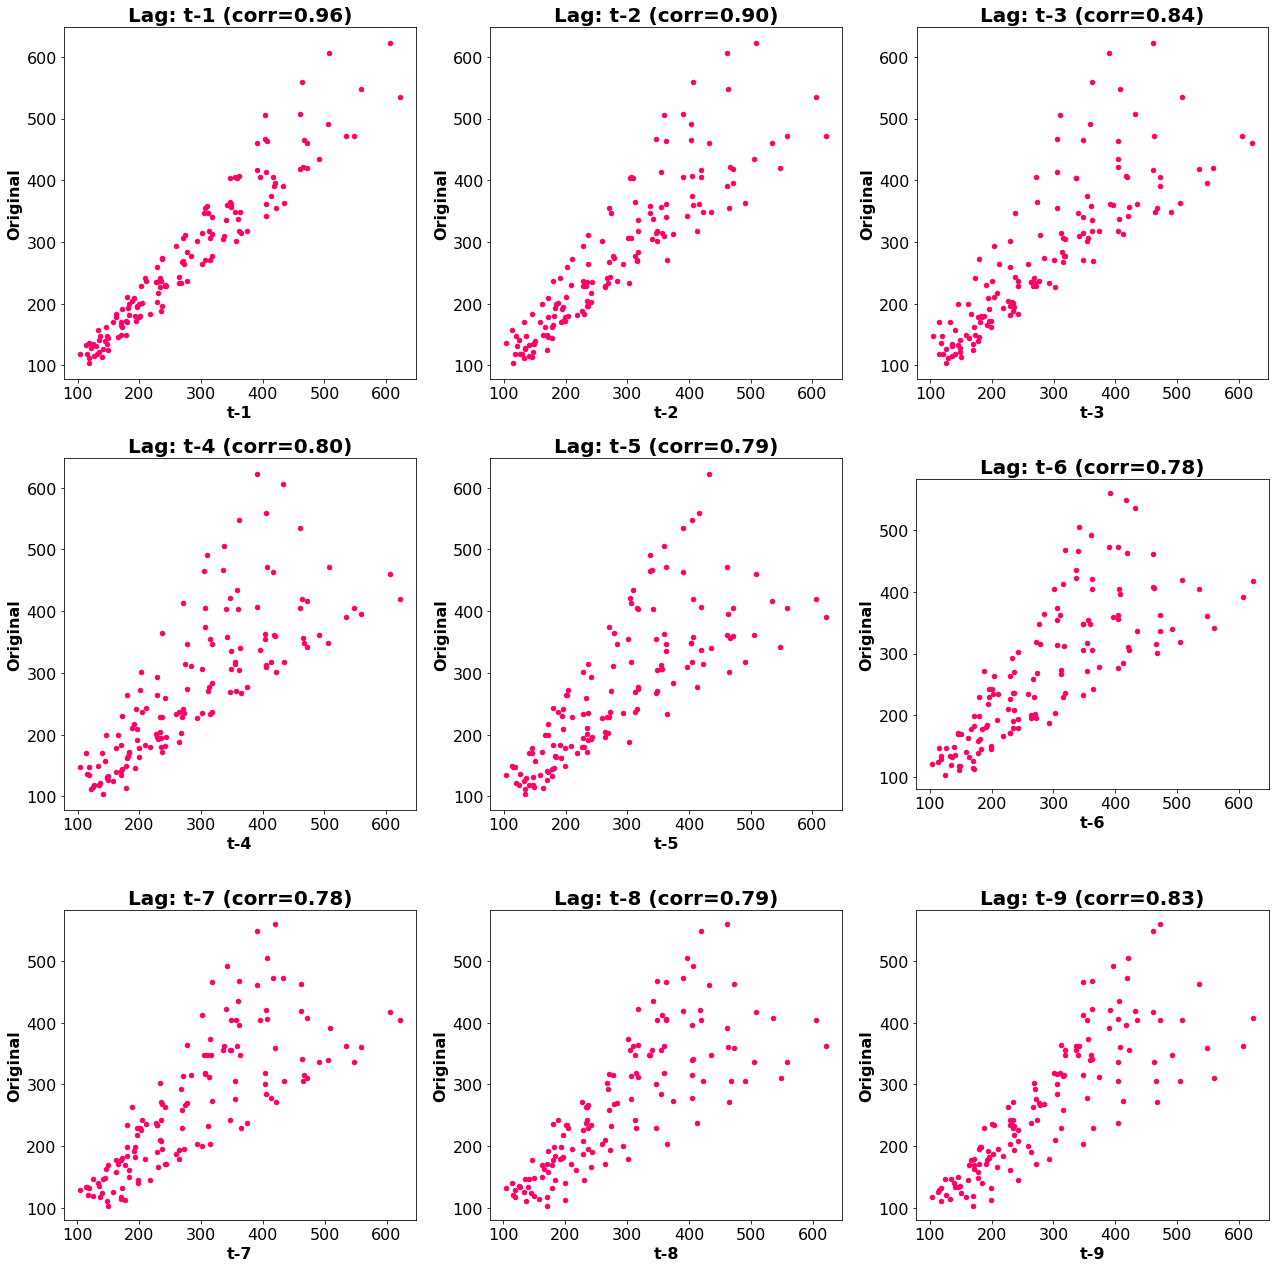

In [ ]:
ncols = 3
nrows = 3
lags = 9

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6 * ncols, 6 * nrows))

for ax, lag in zip(axes.flat, np.arange(1, lags + 1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([df, df.shift(-lag)], axis=1, keys=['y']+[lag_str]).dropna())
    
    # plot data
    X.plot(ax=ax, kind='scatter', y='y', x=lag_str, color='#FF0066');
    corr = X.corr().values[0][1]
    ax.set_ylabel('Original');
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal')

fig.tight_layout()
plt.show()

각 래그마다 강한 선형 관계를 띄고 있는 것을 보아 statinary가 아님을 알 수 있음.

### Vacation example

In [ ]:
## Load data set and safe to DataFrame
datapath = '/content/drive/MyDrive/Time Series/df_vacation.csv'
vacation = pd.read_csv(datapath, index_col='Month', parse_dates=True)
vacation.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', name='Month', length=190, freq=None)

In [ ]:
# Autocorrelation
autocorrelation = vacation['Num_Search_Vacation'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 0.80


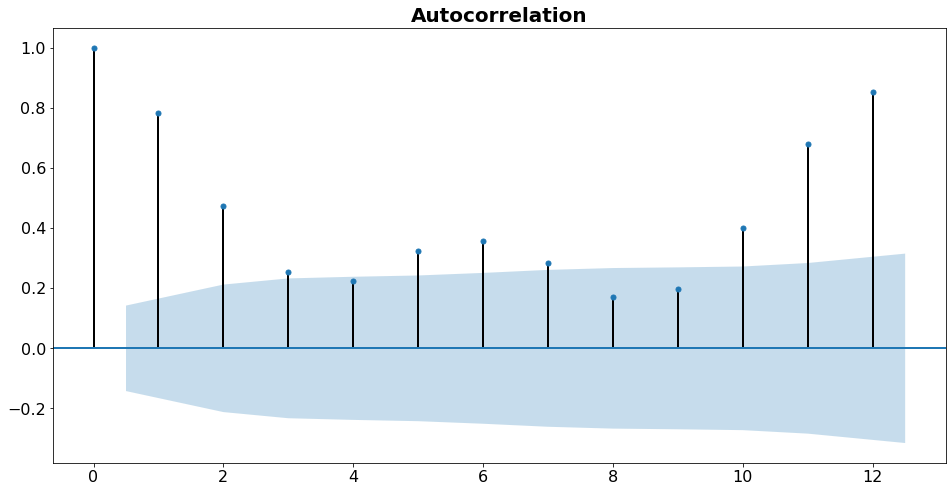

In [ ]:
## Plot ACF to visualize the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(vacation['Num_Search_Vacation'], lags=12);

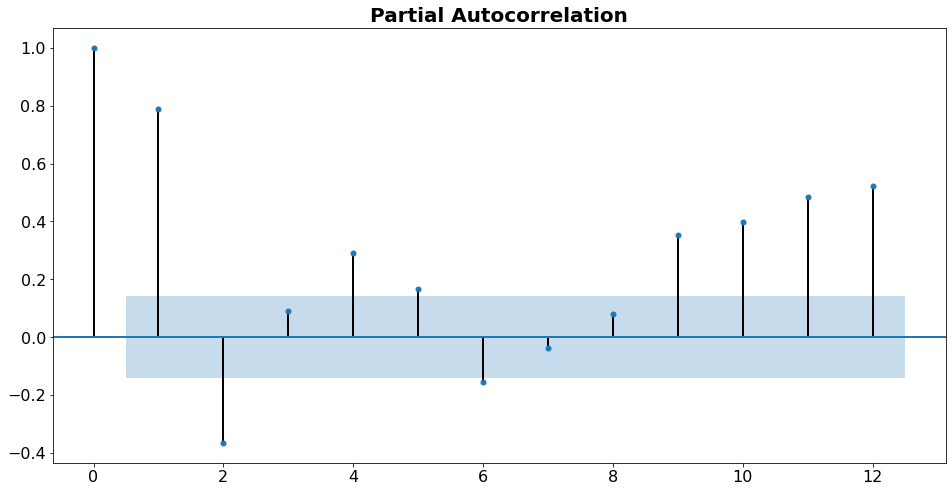

In [ ]:
## Plot Partial autocorrelation function (PACF)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(vacation['Num_Search_Vacation'], lags=12);

### Furniture examples

In [ ]:
## Data set and safe to DataFrame
datapath = '/content/drive/MyDrive/Time Series/df_furniture.csv'
furniture = pd.read_csv(datapath)#, index_col='Month', parse_dates=True)
furniture

,Millions of Dollars
0,3846
1,3908
2,4157
3,4141
4,4275
...,...
326,9793
327,9271
328,10004
329,9432


In [ ]:
# Autocorrelation
autocorrelation = furniture['Millions of Dollars'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

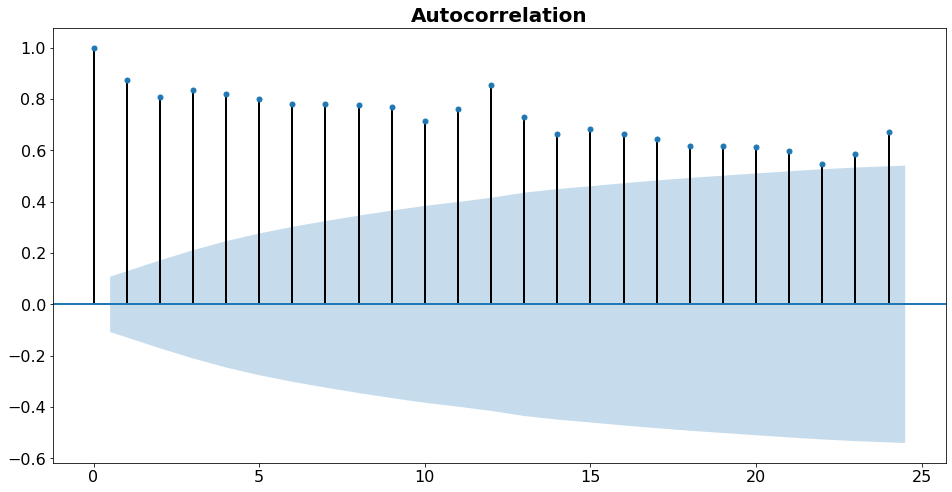

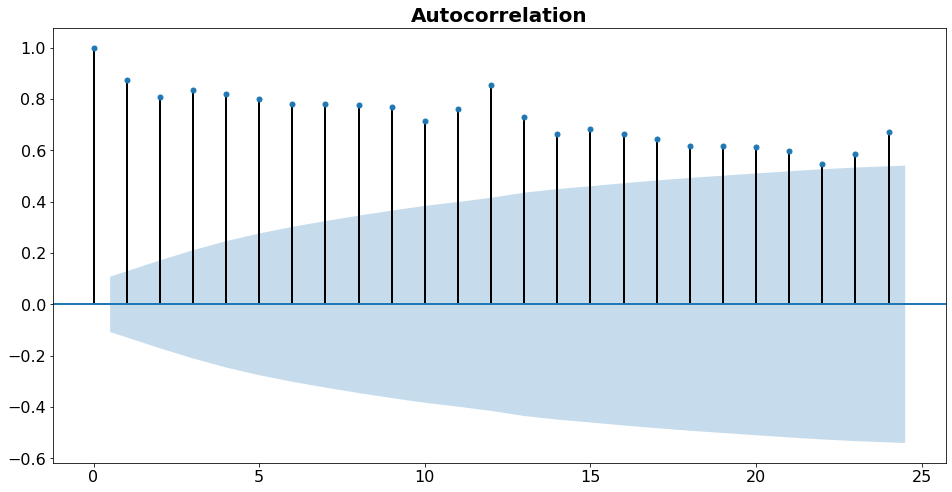

In [ ]:
## Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(furniture['Millions of Dollars'], lags=24)

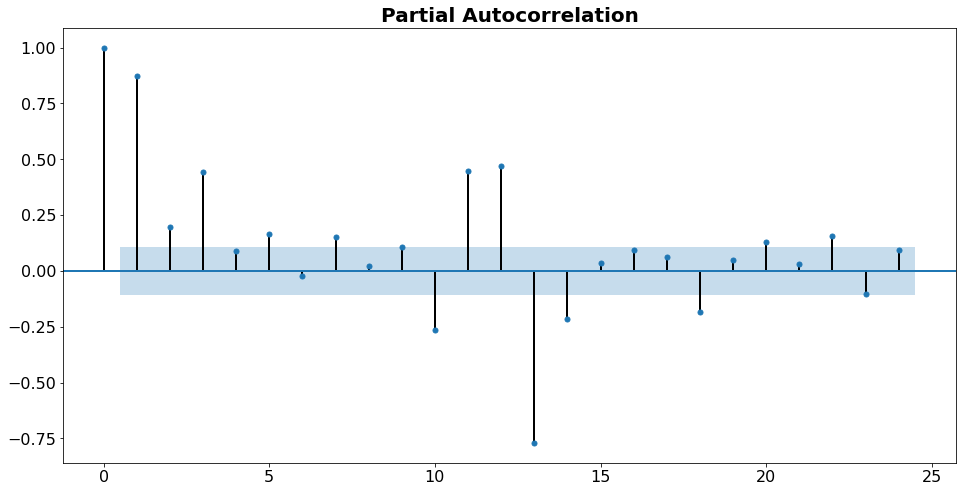

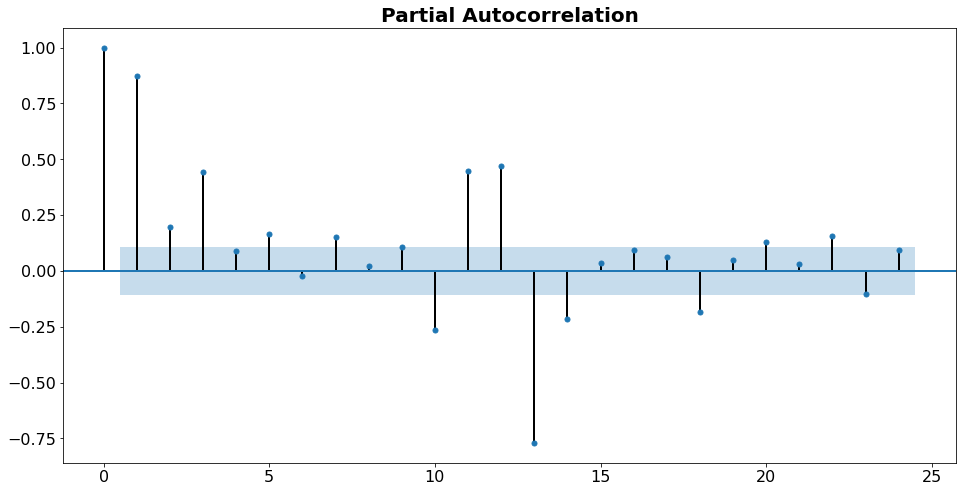

In [ ]:
## Partial Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(furniture['Millions of Dollars'], lags=24)

## 2.4 White noise

Random process의 각 component의 확률 평균이 0이고 유한한 분산을 가지면서 uncorrelated 되었을 때 white noise process.

$$
x_t = \varepsilon_t
$$

where $\varepsilon_t \sim (0, \sigma^2)$ with $\sigma^2 < \infty$, and $E[\varepsilon_t\varepsilon_s] = 0$ for all $t \neq s$.

Time series를 모델링은 fitting 이후의 잔차가 white noise를 따르도록 하는 과정.

In [ ]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def ts_plot(y, lags=None, title=''):
    '''
    Calculate acf, pacf, histogram, and qq plot for a given time series
    '''
    ## 입력 y를 pandas Series로 만들어줌
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    ## Plot 위치 설정
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    ## Ploting
    y.plot(ax=ts_ax)
    plt.legend(loc='best')
    ts_ax.set_title(title)
    
    ## acf and pacf
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    ## qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('Normal QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    plt.tight_layout()
    plt.show()
    return

No handles with labels found to put in legend.


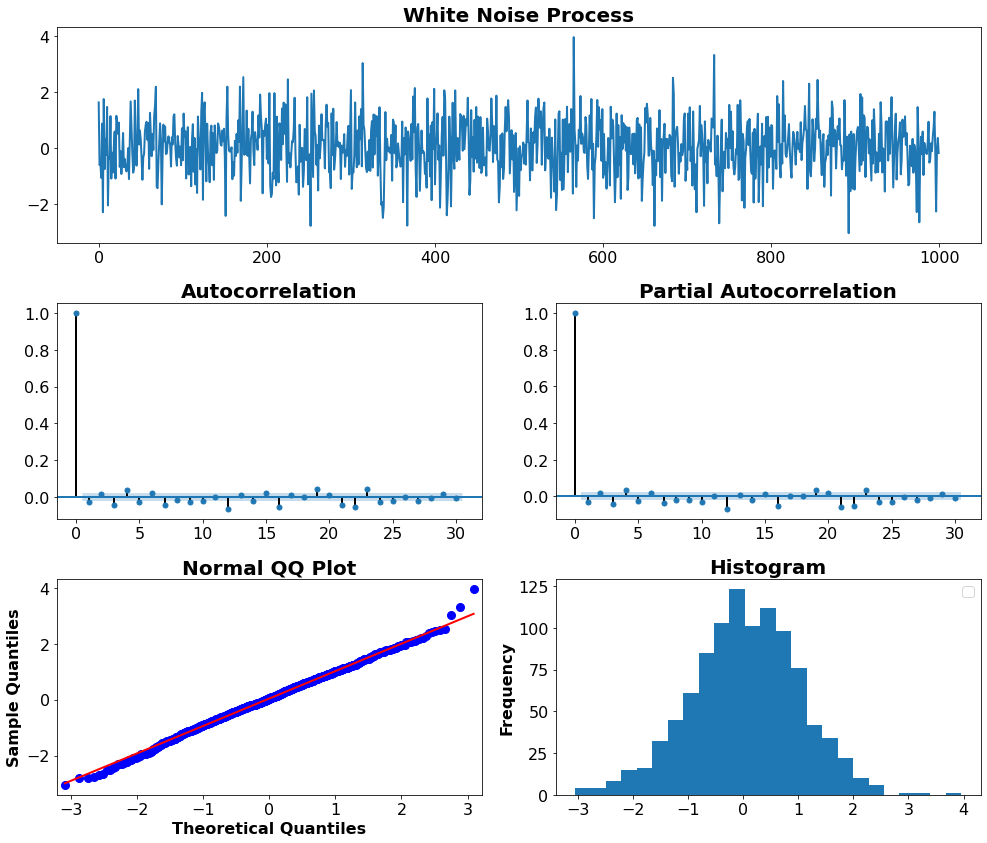

In [ ]:
np.random.seed(1)

# simulate discrete Gaussian white noise N(0, 1)
e = np.random.normal(size=1000)
#e = np.random.standard_t(size=1000, df=1)
ts_plot(e, lags=30, title='White Noise Process')

## 2.6 The Autoregressive Model - AR(p)

현재 관측치가 이전 관측치들과 현재의 노이즈의 선형 결합으로 이루어진 모델 

$$
x_t = \mu + \sum_{i=1}^p\phi_p x_{t-p} + \varepsilon_t
$$

AR(1)

$$
x_t = \mu + \phi x_{t-1} + \varepsilon_{t}
$$

No handles with labels found to put in legend.


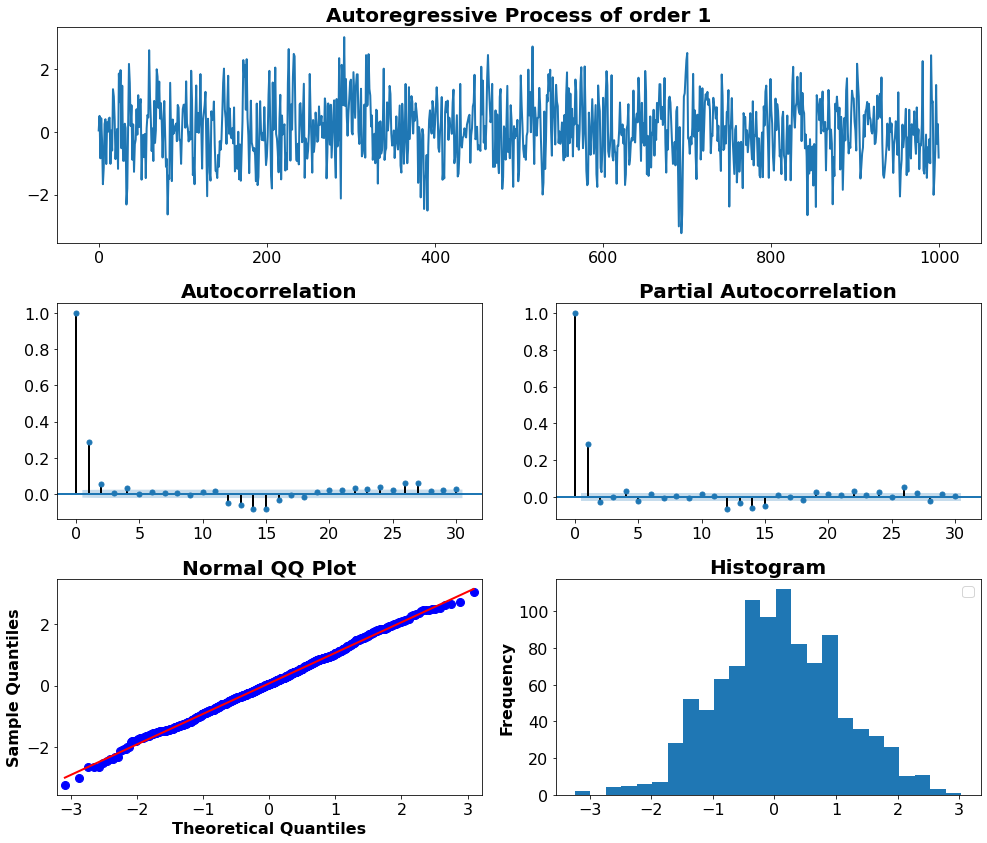

In [ ]:
np.random.seed(4)

## Parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.3

## Simulate AR(1)
for t in range(T):
    x[t] = phi * x[t-1] + e[t]

ts_plot(x, lags=30, title='Autoregressive Process of order 1')

ACF와 PACF 에서 첫 번째 래그의 spike를 확인할 수 있고 stationary


## 2.7 The Moving Average Model - MA(q)

현재 관측치가 현재 노이즈와 이전 노이즈의 선형 결합으로 이루어진 모델 

$$
x_t = \varepsilon_t + \sum_{i=1}^q\theta_q\varepsilon_{t-q}
$$

MA(2)

$$
x_t = \varepsilon_t + 0.8 \varepsilon_{t-1} -1.4 \varepsilon_{t-2}
$$

No handles with labels found to put in legend.


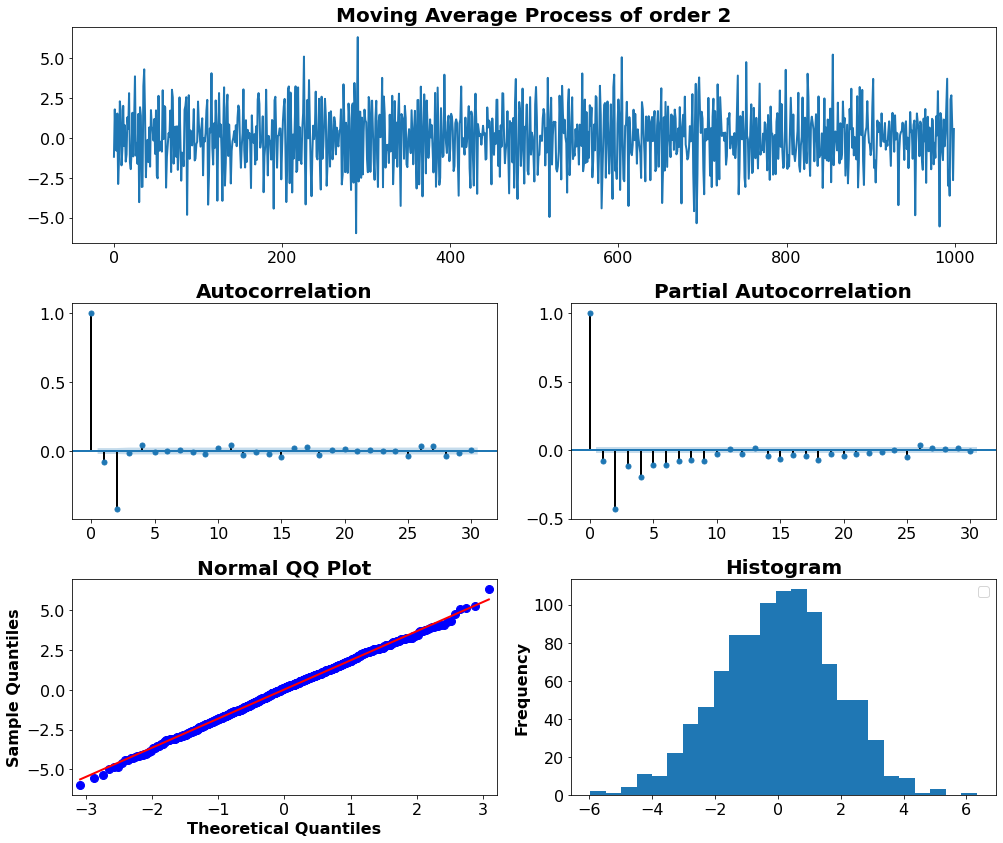

In [ ]:
np.random.seed(4)

## Parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
theta1 = 0.8
theta2 = - 1.4

## Simulate MA(2)
for t in range(T):
    x[t] = e[t] + theta1 * e[t-1] + theta2 * e[t-2]

    # plot series
ts_plot(x, lags=30, title='Moving Average Process of order 2')

PACF가 exponentially 하게 감소하면서 ACF는 두 번째 래그까지 spike인 것을 볼 수 있음